In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\OnlineRetail.csv",encoding='latin1')
df.shape

(541909, 8)

In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(5268)

In [5]:
df=df.dropna(subset=['CustomerID'])

In [6]:
df=df.dropna(subset=['Description'])

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df=df.drop_duplicates()

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(401604, 8)

In [11]:
df_sample = df.sample(n=4000, random_state=42)
df_sample.to_csv("OnlineRetail_Sample4000.csv", index=False)

In [12]:
df_sample.shape

(4000, 8)

In [13]:
df_sample.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [14]:
df_sample.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [15]:
df_sample.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
df_sample.duplicated().sum()

np.int64(0)

In [17]:
df_sample.describe()

,Quantity,UnitPrice,CustomerID
count,4000.000000,4000.000000,4000.000000
mean,15.124750,3.167090,15282.618500
std,204.231024,6.393732,1709.250585
min,-110.000000,0.000000,12347.000000
25%,2.000000,1.250000,13985.750000
50%,5.000000,1.950000,15159.000000
75%,12.000000,3.750000,16779.000000
max,12540.000000,280.050000,18283.000000


In [18]:
df_sample['TotalPrice'] = df_sample['Quantity'] * df_sample['UnitPrice']

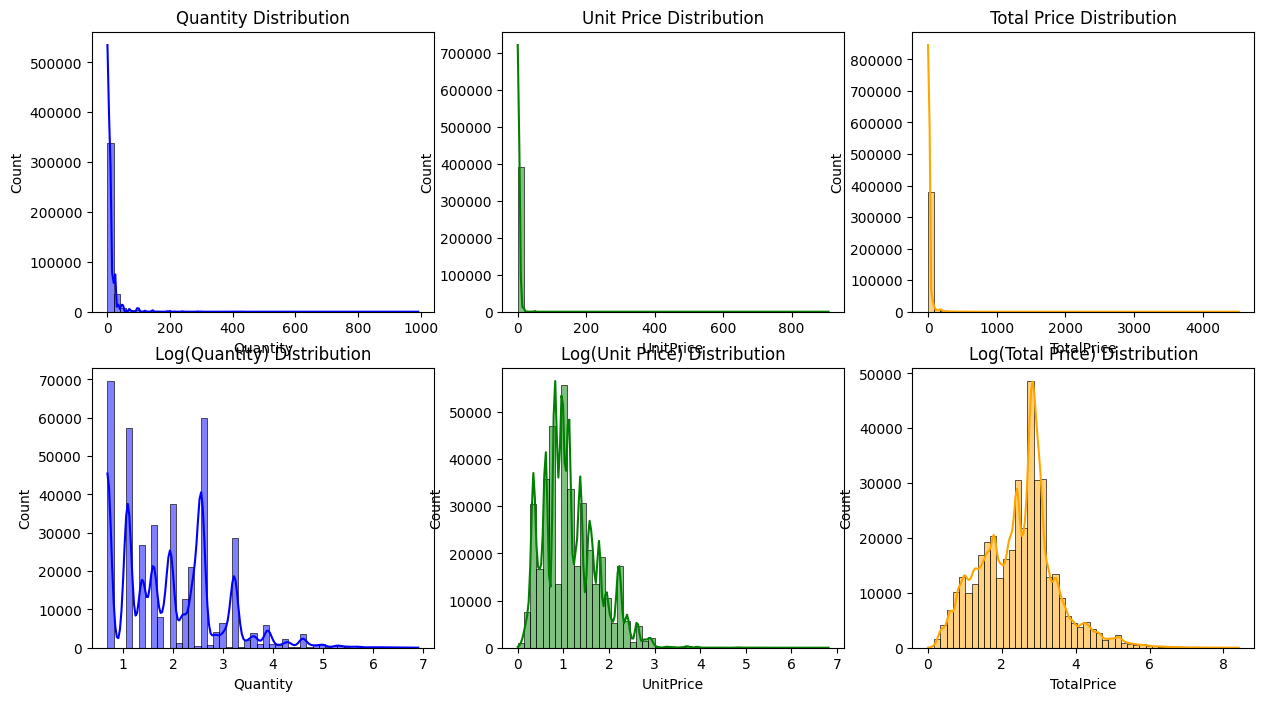

In [19]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df = df[df['TotalPrice'] > 0]

df = df[(df['Quantity'] < 1000) & (df['UnitPrice'] < 1000) & (df['TotalPrice'] < 5000)]

plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
sns.histplot(df['Quantity'], bins=50, kde=True, color='blue')
plt.title("Quantity Distribution")

plt.subplot(2,3,4)
sns.histplot(np.log1p(df['Quantity']), bins=50, kde=True, color='blue')
plt.title("Log(Quantity) Distribution")

plt.subplot(2,3,2)
sns.histplot(df['UnitPrice'], bins=50, kde=True, color='green')
plt.title("Unit Price Distribution")

plt.subplot(2,3,5)
sns.histplot(np.log1p(df['UnitPrice']), bins=50, kde=True, color='green')
plt.title("Log(Unit Price) Distribution")

plt.subplot(2,3,3)
sns.histplot(df['TotalPrice'], bins=50, kde=True, color='orange')
plt.title("Total Price Distribution")

plt.subplot(2,3,6)
sns.histplot(np.log1p(df['TotalPrice']), bins=50, kde=True, color='orange')
plt.title("Log(Total Price) Distribution")

plt.show()


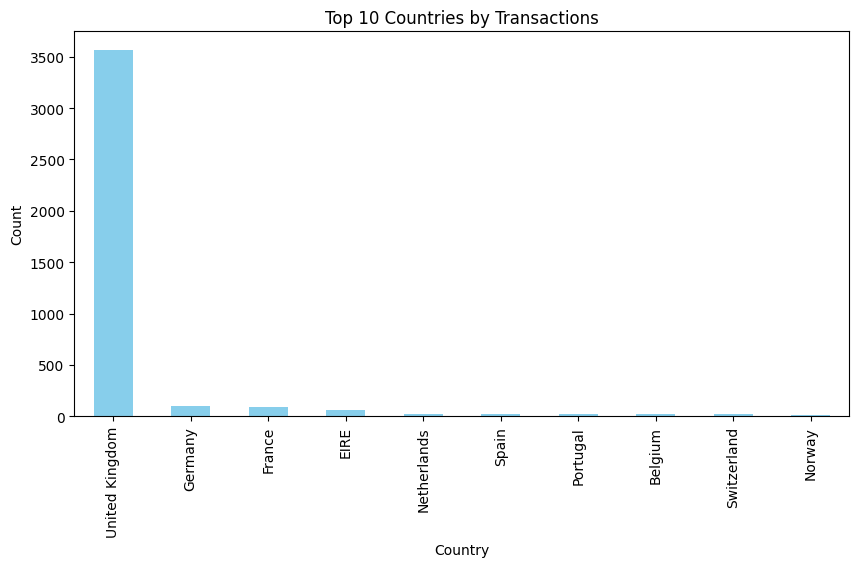

In [20]:
plt.figure(figsize=(10,5))
df_sample['Country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries by Transactions")
plt.ylabel("Count")
plt.show()

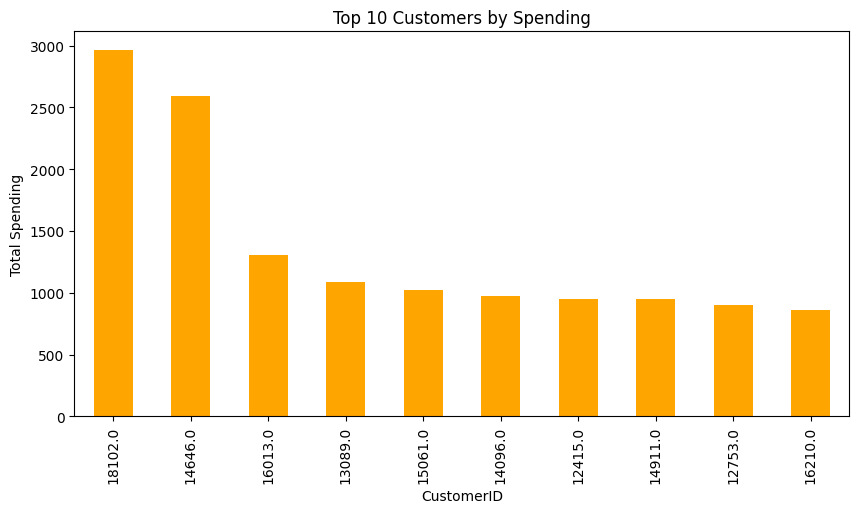

In [21]:
top_customers = df_sample.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_customers.plot(kind='bar', color='orange')
plt.title("Top 10 Customers by Spending")
plt.ylabel("Total Spending")
plt.show()


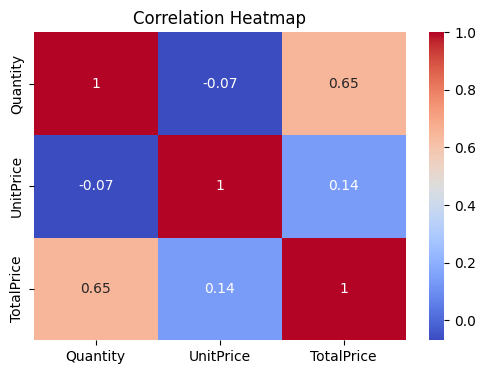

In [22]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Quantity','UnitPrice','TotalPrice']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

df_sample['TotalPrice'] = df_sample['Quantity'] * df_sample['UnitPrice']

X = df_sample[['Quantity', 'UnitPrice', 'TotalPrice']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df_sample['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

hier = AgglomerativeClustering(n_clusters=4)
df_sample['Hier_Cluster'] = hier.fit_predict(X_scaled)

dbscan = DBSCAN(eps=1.5, min_samples=10)
df_sample['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

print(df_sample.groupby('KMeans_Cluster')[['Quantity','UnitPrice','TotalPrice']].mean())

print("\nHierarchical Clustering Summary:")
print(df_sample.groupby('Hier_Cluster')[['Quantity','UnitPrice','TotalPrice']].mean())

print("\nDBSCAN Clustering Summary:")
print(df_sample.groupby('DBSCAN_Cluster')[['Quantity','UnitPrice','TotalPrice']].mean())


                    Quantity   UnitPrice  TotalPrice
KMeans_Cluster                                      
0                  10.946550    3.098743   17.721445
1                   1.000000  280.050000  280.050000
2                 333.538462    3.063077  833.067692
3               12540.000000    0.000000    0.000000

Hierarchical Clustering Summary:
                  Quantity   UnitPrice  TotalPrice
Hier_Cluster                                      
0                10.946550    3.098743   17.721445
1                 1.000000  280.050000  280.050000
2               333.538462    3.063077  833.067692
3             12540.000000    0.000000    0.000000

DBSCAN Clustering Summary:
                  Quantity  UnitPrice  TotalPrice
DBSCAN_Cluster                                   
-1              679.433333  34.050000  403.874667
 0               10.104786   2.933718   17.534924


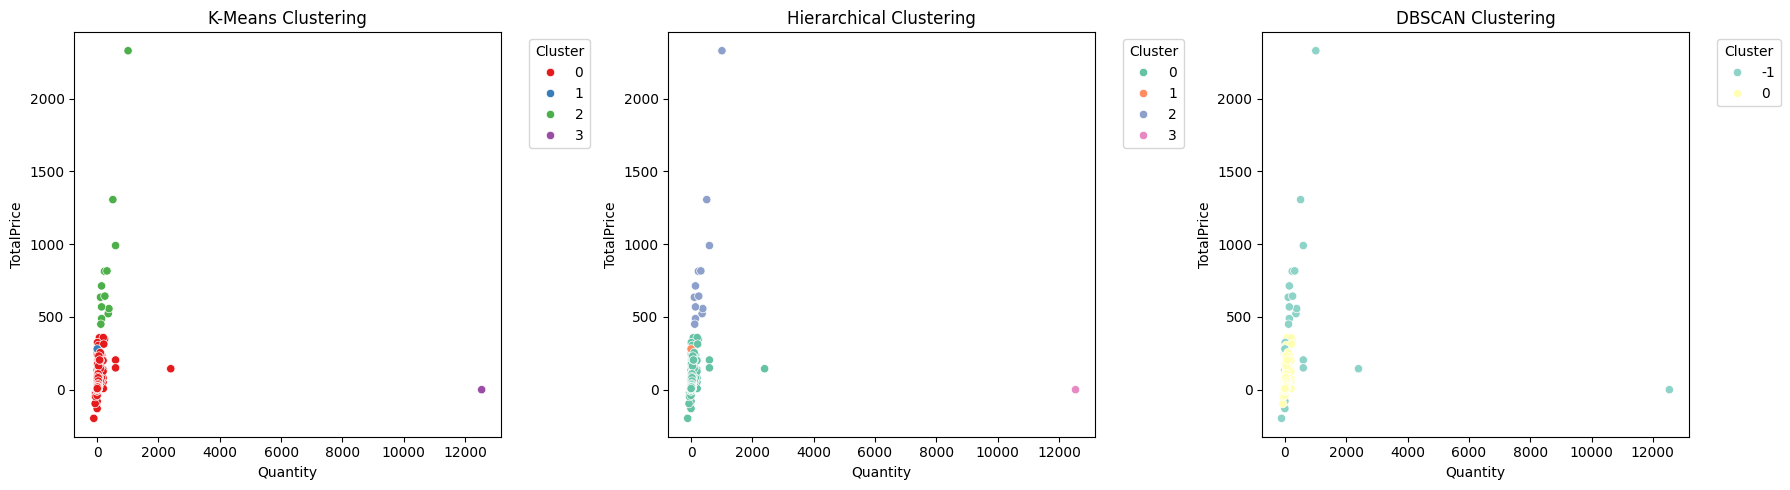

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.scatterplot(data=df_sample, x='Quantity', y='TotalPrice', hue='KMeans_Cluster', palette='Set1')
plt.title("K-Means Clustering")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1,3,2)
sns.scatterplot(data=df_sample, x='Quantity', y='TotalPrice', hue='Hier_Cluster', palette='Set2')
plt.title("Hierarchical Clustering")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1,3,3)
sns.scatterplot(data=df_sample, x='Quantity', y='TotalPrice', hue='DBSCAN_Cluster', palette='Set3')
plt.title("DBSCAN Clustering")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [25]:

print("\nCluster Sizes:")
print("KMeans:", df_sample['KMeans_Cluster'].value_counts().to_dict())
print("Hierarchical:", df_sample['Hier_Cluster'].value_counts().to_dict())
print("DBSCAN:", df_sample['DBSCAN_Cluster'].value_counts().to_dict())



Cluster Sizes:
KMeans: {0: 3985, 2: 13, 3: 1, 1: 1}
Hierarchical: {0: 3985, 2: 13, 3: 1, 1: 1}
DBSCAN: {0: 3970, -1: 30}


In [26]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

results = []

models = {
    "KMeans": df_sample['KMeans_Cluster'],
    "Hierarchical": df_sample['Hier_Cluster'],
    "DBSCAN": df_sample['DBSCAN_Cluster']
}

for name, labels in models.items():
    if len(set(labels)) > 1 and len(set(labels)) < len(labels):  # valid clustering
        sil = silhouette_score(X_scaled, labels)
        cal = calinski_harabasz_score(X_scaled, labels)
        dbi = davies_bouldin_score(X_scaled, labels)
        results.append([name, sil, cal, dbi])
    else:
        results.append([name, None, None, None])

metrics_df = pd.DataFrame(results, columns=["Model", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"])
print("Clustering Evaluation Results:\n")
print(metrics_df)

best_sil = metrics_df.loc[metrics_df['Silhouette'].idxmax(), 'Model']
best_cal = metrics_df.loc[metrics_df['Calinski-Harabasz'].idxmax(), 'Model']
best_dbi = metrics_df.loc[metrics_df['Davies-Bouldin'].idxmin(), 'Model']

print("\nBest Models:")
print(f"Highest Silhouette Score: {best_sil}")
print(f"Highest Calinski-Harabasz Score: {best_cal}")
print(f"Lowest Davies-Bouldin Score: {best_dbi}")


Clustering Evaluation Results:

          Model  Silhouette  Calinski-Harabasz  Davies-Bouldin
0        KMeans    0.943767        2600.413422        0.274913
1  Hierarchical    0.943767        2600.413422        0.274913
2        DBSCAN    0.942594         889.508926        1.425716

Best Models:
Highest Silhouette Score: KMeans
Highest Calinski-Harabasz Score: KMeans
Lowest Davies-Bouldin Score: KMeans


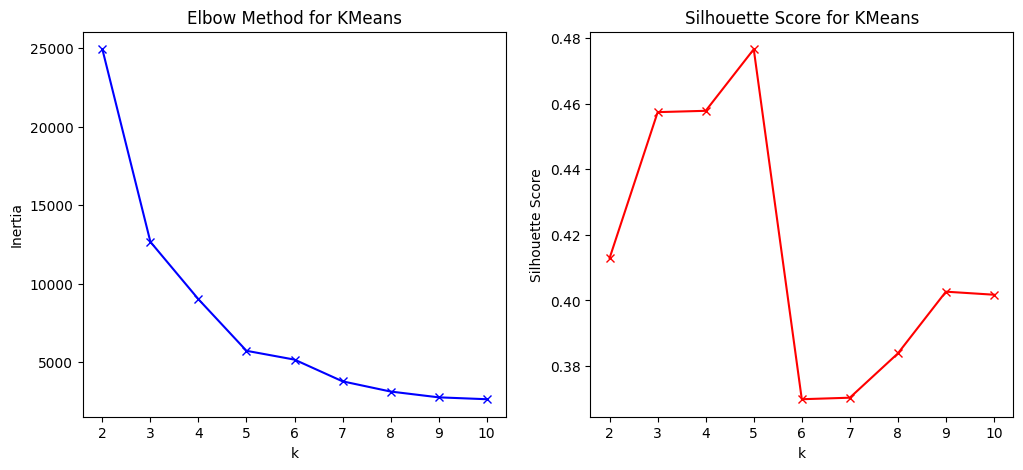

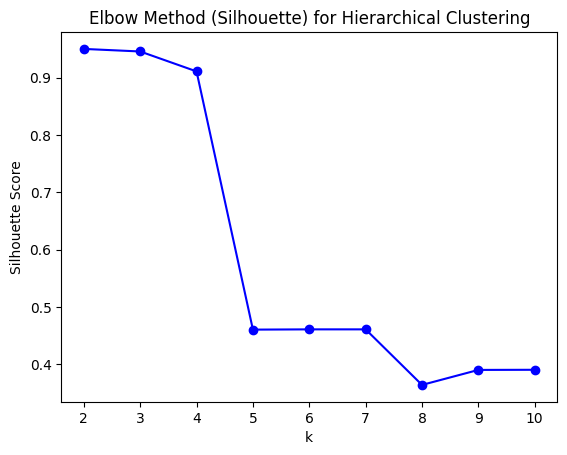

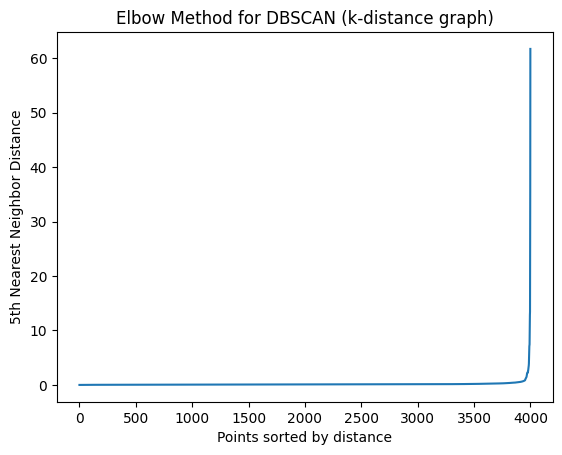

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors


numeric_df = df_sample.select_dtypes(include=[np.number]).dropna()

scaler = StandardScaler()
X = scaler.fit_transform(numeric_df)

inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans')

plt.subplot(1,2,2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for KMeans')
plt.show()

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

dist_matrix = pdist(X, metric='euclidean')
Z = linkage(dist_matrix, method='ward')

silhouette_scores_h = []
for k in K:
    labels = fcluster(Z, k, criterion='maxclust')
    silhouette_scores_h.append(silhouette_score(X, labels))

plt.plot(K, silhouette_scores_h, 'bo-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Elbow Method (Silhouette) for Hierarchical Clustering')
plt.show()

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances[:,4])

plt.plot(distances)
plt.ylabel("5th Nearest Neighbor Distance")
plt.xlabel("Points sorted by distance")
plt.title("Elbow Method for DBSCAN (k-distance graph)")
plt.show()
